In [1]:
# Import pandas(for making data tables)
import pandas as pd
import numpy as np

# Graphing modules
import matplotlib.pyplot as plt
from matplotlib import cm as cm
from matplotlib import mlab as ml
import seaborn as sns

# Makes plots in notebook
%matplotlib inline

In [2]:
# Create a Dataframe and drop extra column
df = pd.read_csv('./data/features_seattle_911_no_dup.csv', low_memory=False)
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.Datetime = pd.to_datetime(df.Datetime)

In [3]:
# Examine head of the DataFrame
df.head()

,Address,Type,Datetime,Latitude,Longitude,Report Location,Incident Number,dt_crop,date,time,...,sounders_home,holiday,weekday,night,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,6900 37th Av S,Medic Response,2011-11-09 23:33:00,47.540683,-122.286131,"(47.540683, -122.286131)",F110104166,11/09/2011 11:33:00 PM,2011-11-09,23:33:00,...,0,0,Wednesday,1,0,0,0,0,0,1
1,N 50th St / Stone Way N,Aid Response,2011-11-09 23:32:00,47.665034,-122.340207,"(47.665034, -122.340207)",F110104164,11/09/2011 11:32:00 PM,2011-11-09,23:32:00,...,0,0,Wednesday,1,0,0,0,0,0,1
2,E John St / E Olive Way,Aid Response,2011-11-09 23:32:00,47.619575,-122.324257,"(47.619575, -122.324257)",F110104165,11/09/2011 11:32:00 PM,2011-11-09,23:32:00,...,0,0,Wednesday,1,0,0,0,0,0,1
3,611 12th Av S,Aid Response,2011-11-09 23:29:00,47.597406,-122.317228,"(47.597406, -122.317228)",F110104162,11/09/2011 11:29:00 PM,2011-11-09,23:29:00,...,0,0,Wednesday,1,0,0,0,0,0,1
4,4545 42nd Av Sw,Automatic Medical Alarm,2011-11-09 23:25:00,47.562472,-122.385455,"(47.562472, -122.385455)",F110104161,11/09/2011 11:25:00 PM,2011-11-09,23:25:00,...,0,0,Wednesday,1,0,0,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551095 entries, 0 to 551094
Data columns (total 24 columns):
Address            551086 non-null object
Type               551095 non-null object
Datetime           551095 non-null datetime64[ns]
Latitude           551095 non-null float64
Longitude          551095 non-null float64
Report Location    520631 non-null object
Incident Number    522111 non-null object
dt_crop            551095 non-null object
date               551095 non-null object
time               551095 non-null object
date2              551095 non-null object
time2              551095 non-null object
mariners_home      551095 non-null int64
seahawks_home      551095 non-null int64
sounders_home      551095 non-null int64
holiday            551095 non-null int64
weekday            551095 non-null object
night              551095 non-null int64
Monday             551095 non-null int64
Saturday           551095 non-null int64
Sunday             551095 non-null int64
Thurs

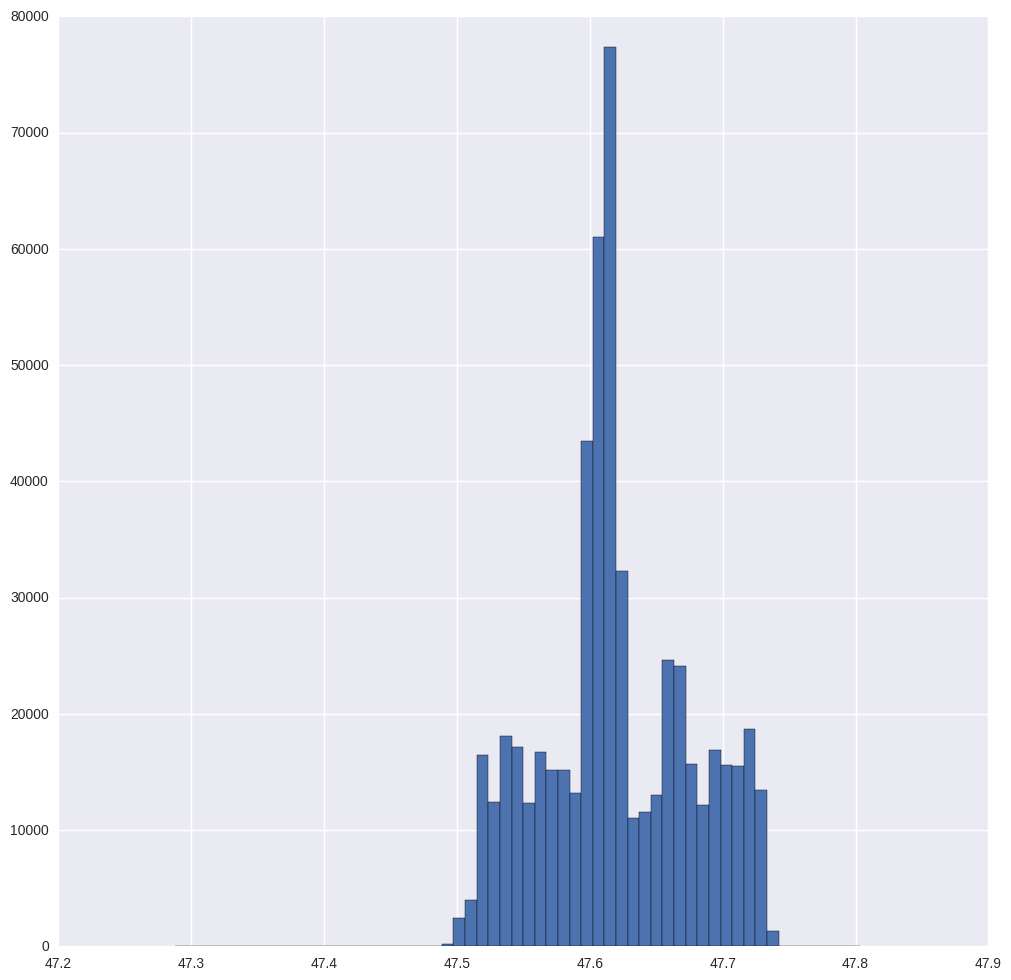

In [5]:
plt.figure(figsize=(12,12))
df.Latitude.hist(bins=60);

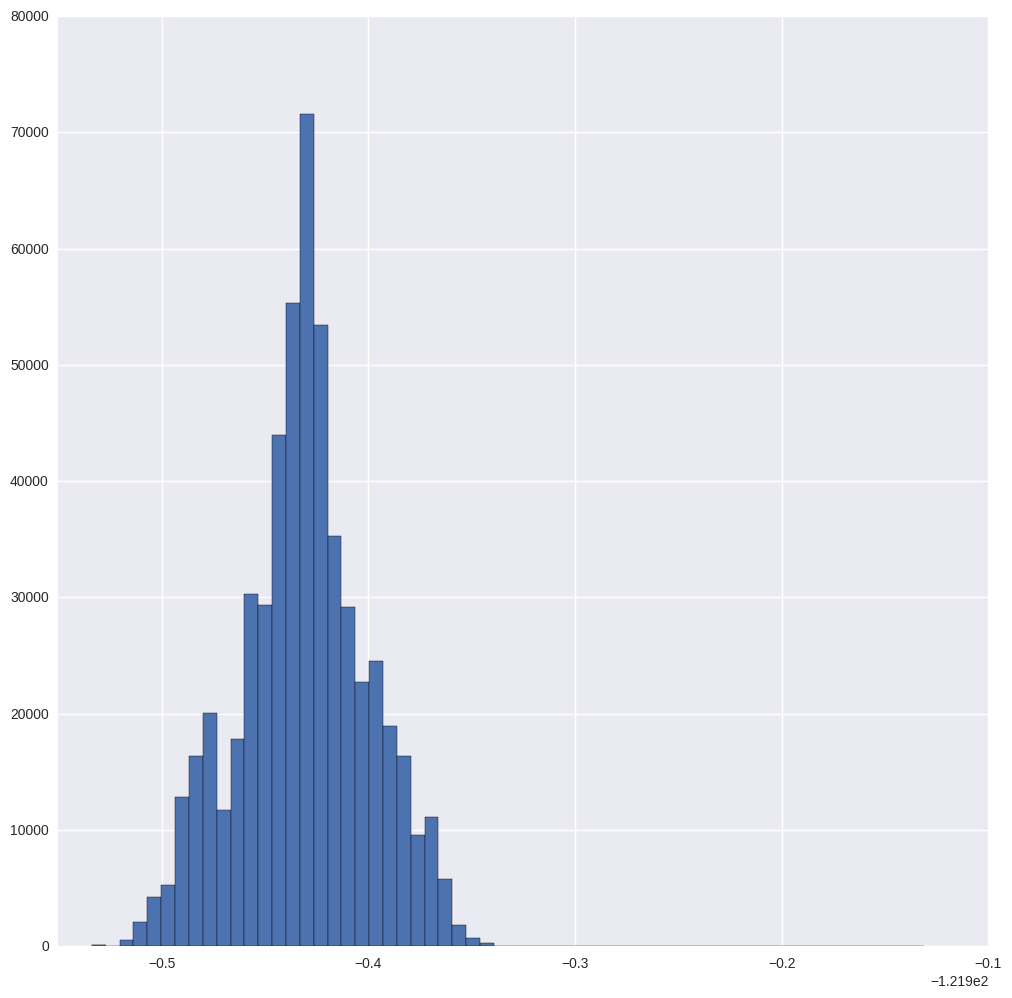

In [6]:
plt.figure(figsize=(12,12))
df.Longitude.hist(bins=60);

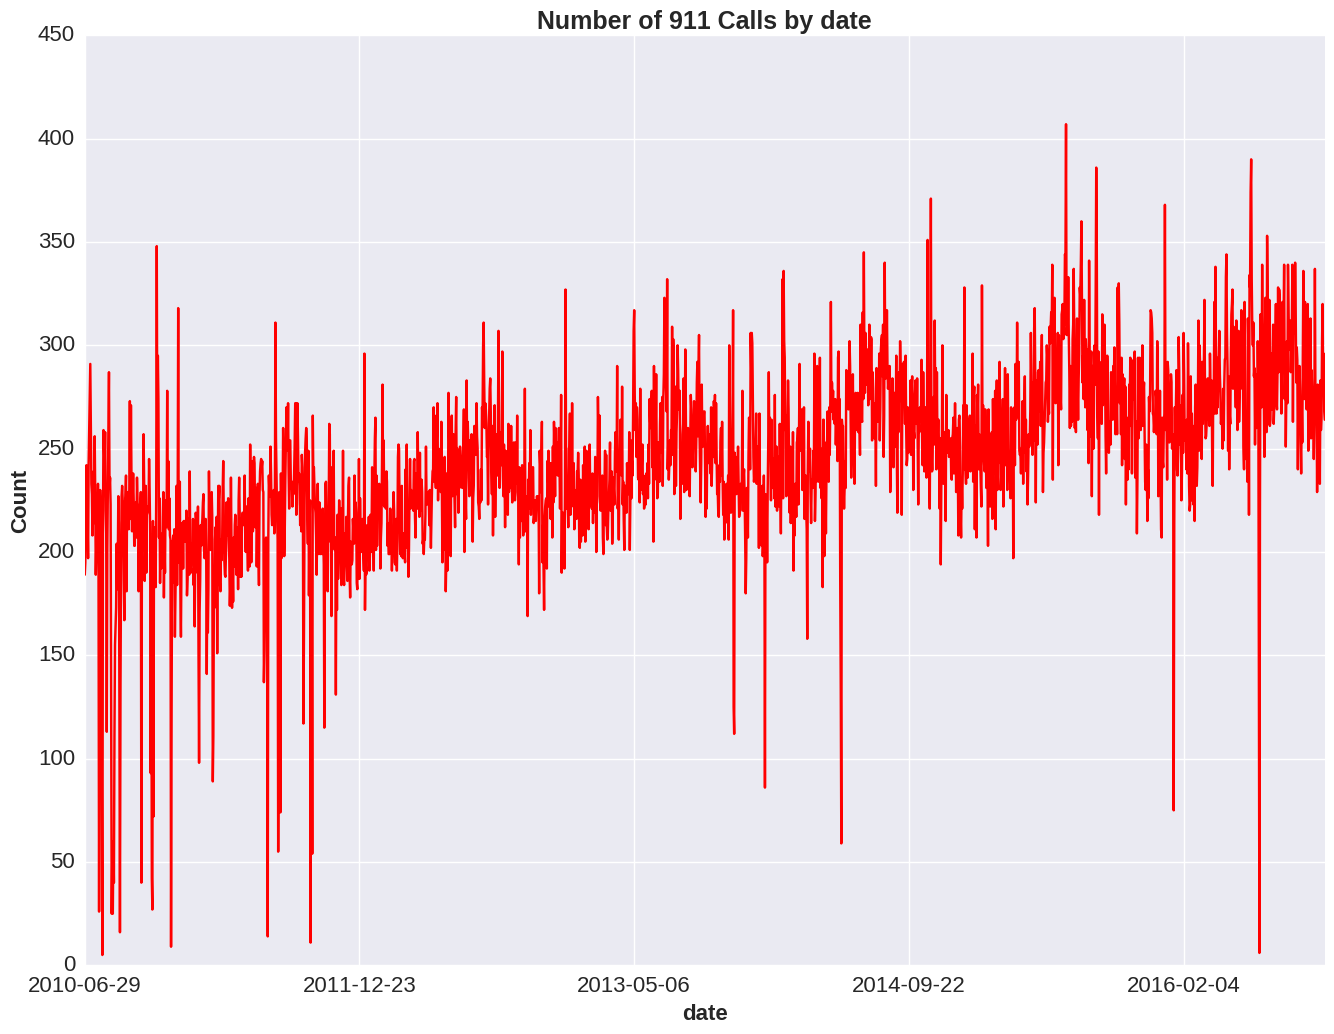

In [7]:
# 911 call counts by day
plt.figure(figsize=(16,12))
plt.xticks(fontsize=16)
plt.xlabel('Date', fontsize=16, fontweight='bold')
plt.yticks(fontsize=16)
plt.ylabel('Count', fontsize=16, fontweight='bold')
plt.title('Number of 911 Calls by date', fontsize=18, fontweight='bold')
df.groupby(by='date').Datetime.count().plot(color='r');

In [15]:
# Days in dataset
len(df.groupby(by='date').Datetime.count())

2258

(0, 200)

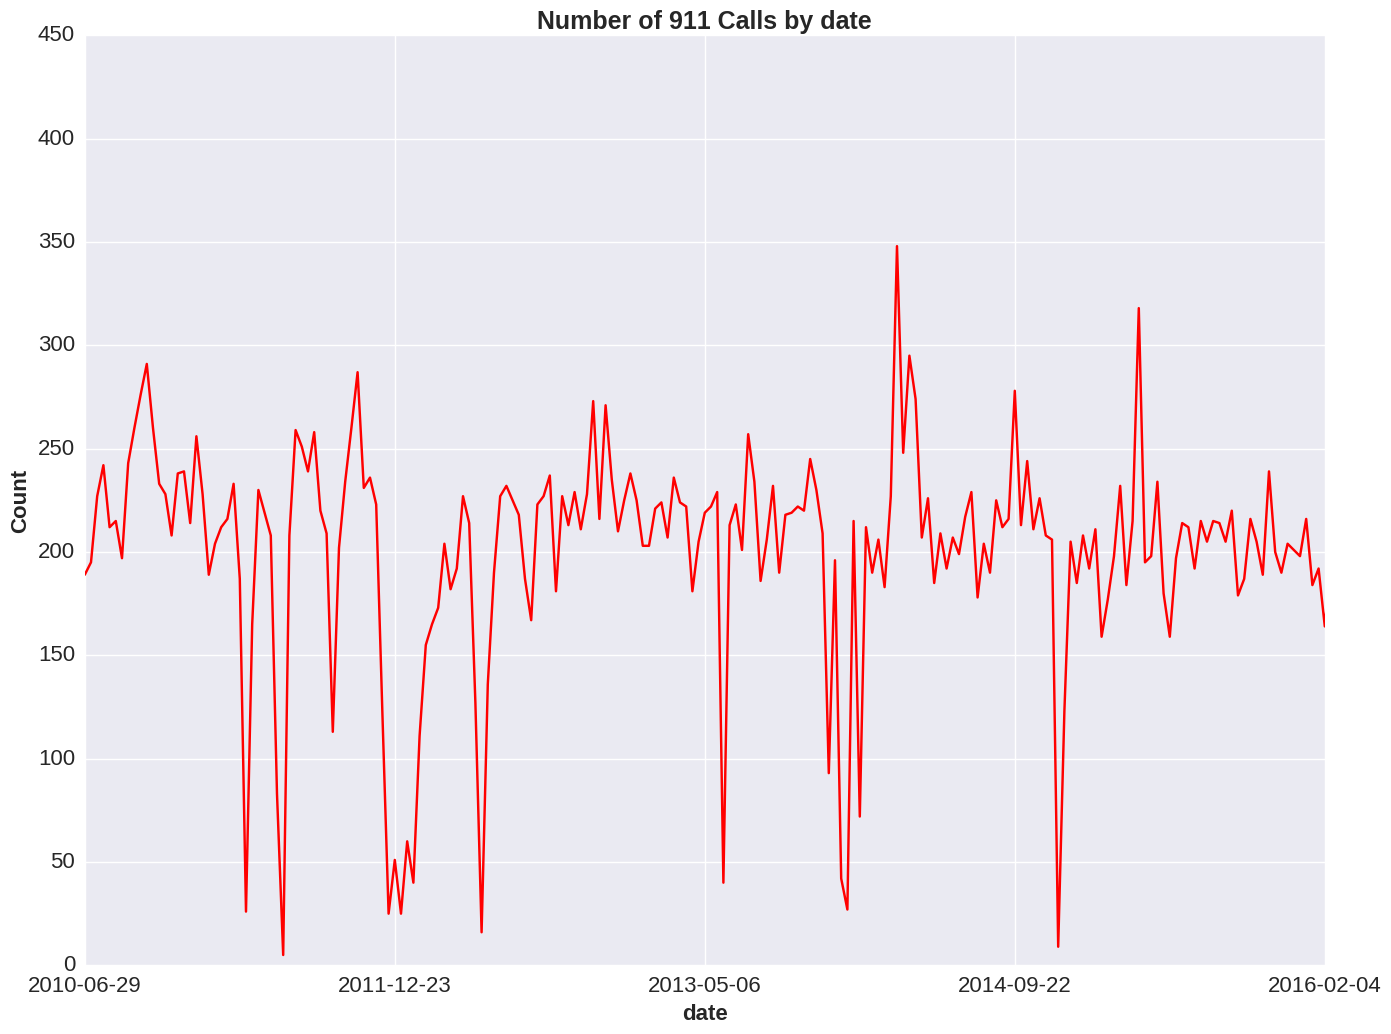

In [16]:
# 
plt.figure(figsize=(16,12))
plt.xticks(fontsize=16)
plt.xlabel('Date', fontsize=16, fontweight='bold')
plt.yticks(fontsize=16)
plt.ylabel('Count', fontsize=16, fontweight='bold')
plt.title('Number of 911 Calls by date', fontsize=18, fontweight='bold')
df.groupby(by='date').Datetime.count().plot(color='r');
plt.xlim(0, 200)

(1200, 2200)

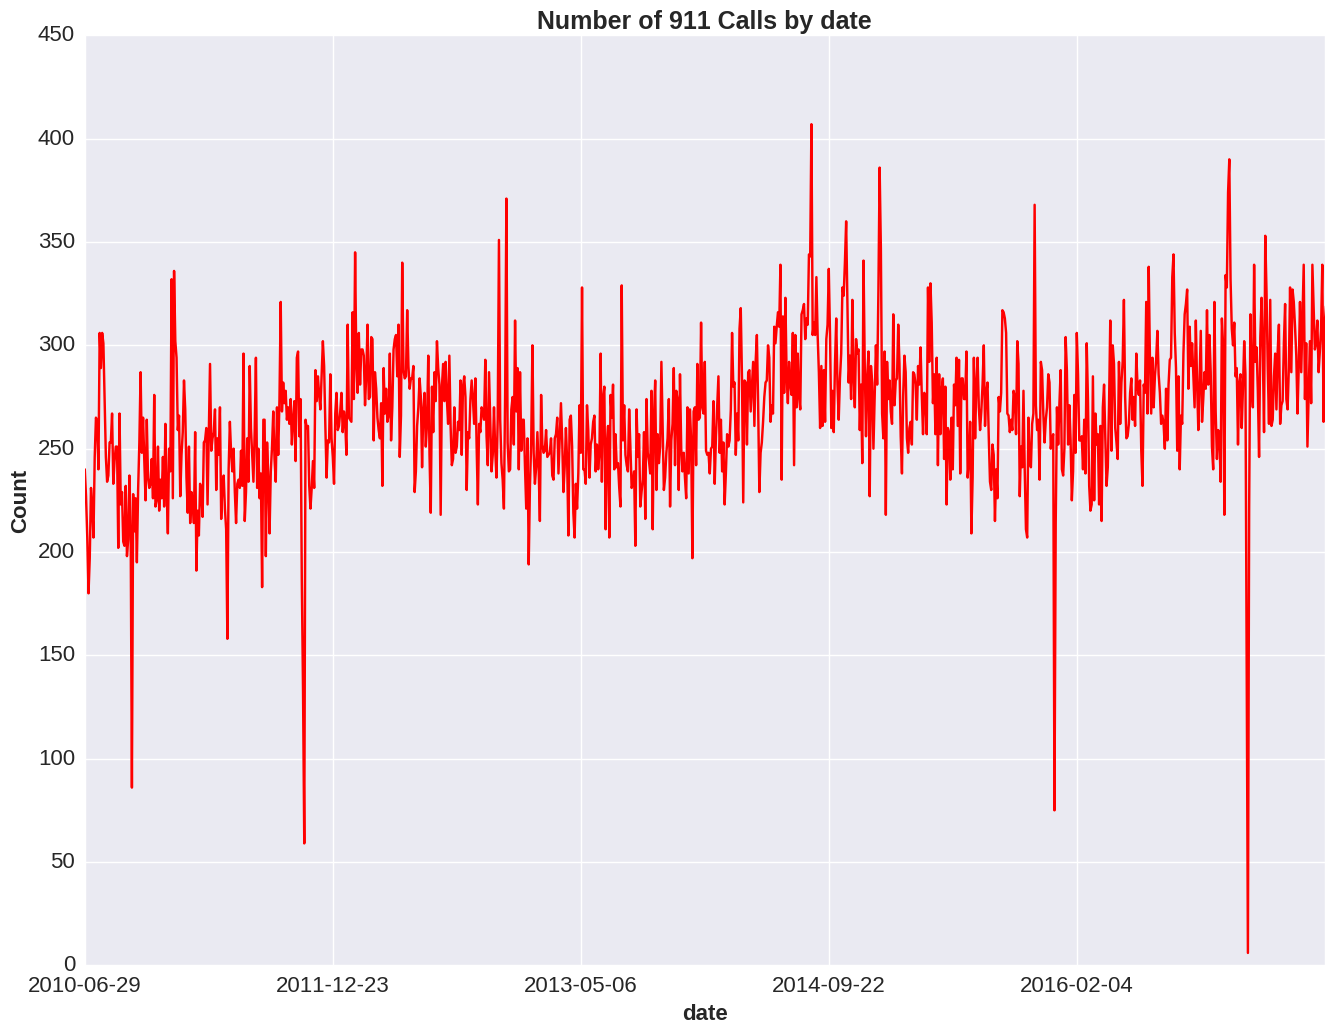

In [19]:
plt.figure(figsize=(16,12))
plt.xticks(fontsize=16)
plt.xlabel('Date', fontsize=16, fontweight='bold')
plt.yticks(fontsize=16)
plt.ylabel('Count', fontsize=16, fontweight='bold')
plt.title('Number of 911 Calls by date', fontsize=18, fontweight='bold')
df.groupby(by='date').Datetime.count().plot(color='r');
plt.xlim(1200, 2200)

In [73]:
df.Datetime.min()

Timestamp('2010-06-29 01:00:00')

In [74]:
df.Datetime.max()

Timestamp('2016-10-19 00:59:00')

In [27]:
# Days with extremely low values. Data capture problem?
df.groupby(by='date').Datetime.count().sort_values().head(15)

date
2010-07-31     5
2016-06-21     6
2010-12-19     9
2011-09-18    11
2011-06-21    14
2010-09-03    16
2010-08-21    25
2010-08-19    25
2010-07-25    26
2010-11-15    27
2010-10-16    40
2010-08-23    40
2010-11-04    42
2010-08-20    51
2011-09-28    54
Name: Datetime, dtype: int64

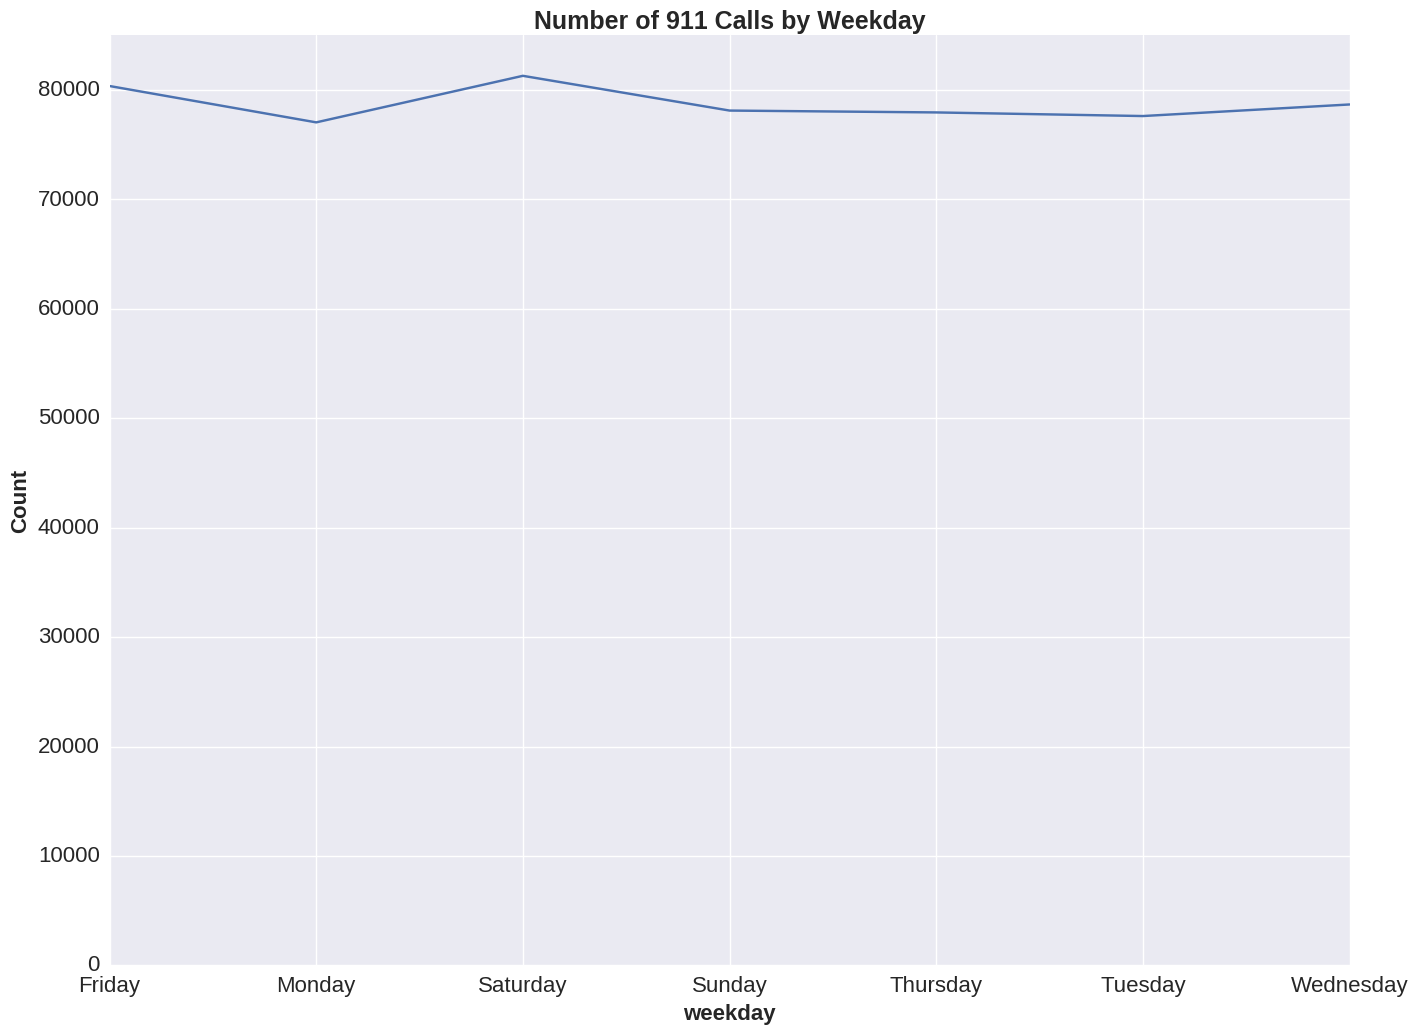

In [88]:
# Friday and Saturday are slightly more active

plt.figure(figsize=(16,12))
plt.xticks(fontsize=16)
plt.xlabel('Weekday', fontsize=16, fontweight='bold')
plt.yticks(fontsize=16)
plt.ylabel('Count', fontsize=16, fontweight='bold')
plt.ylim(0,85000)
plt.title('Number of 911 Calls by Weekday', fontsize=18, fontweight='bold')
df.groupby(by='weekday').Latitude.count().plot();

In [106]:
# Nighttime is more active
df[df.night == 1].groupby(by='date').Latitude.count().mean()

140.5571302037201

In [107]:
df[df.night == 0].groupby(by='date').Latitude.count().mean()

103.96663701067615

In [96]:
# Total dates
df.date.nunique()

2258

In [99]:
# Average daily 911 medical calls on game days
df.groupby(by='date').Latitude.count().mean()

244.06333038086802

In [100]:
df[df.seahawks_home == 1].groupby(by='date').Latitude.count().mean()

235.75

In [102]:
df[df.mariners_home == 1].groupby(by='date').Latitude.count().mean()

250.53322528363046

In [104]:
df[df.sounders_home == 1].groupby(by='date').Latitude.count().mean()

254.93333333333334

In [108]:
# Holiday Calls
df[df.holiday == 1].groupby(by='date').Latitude.count().mean()

235.17708333333334

In [109]:
df[df.holiday == 0].groupby(by='date').Latitude.count().mean()

244.45790934320075

In [120]:
df[df.date == '2015-07-04'].groupby(by='date').Latitude.count().mean()

343.0

In [124]:
df[df.date == '2013-02-03'].groupby(by='date').Latitude.count().mean()

223.0

In [119]:
# Write holiday activity searching function

247.0

In [11]:
# Restrict Latitude and Longitude ranges for tighter plots
df = df[((df['Latitude'] < 47.77) & (df['Latitude'] > 47.47))]
df = df[((df['Longitude'] < -122.25) & (df['Longitude'] > -122.55))]

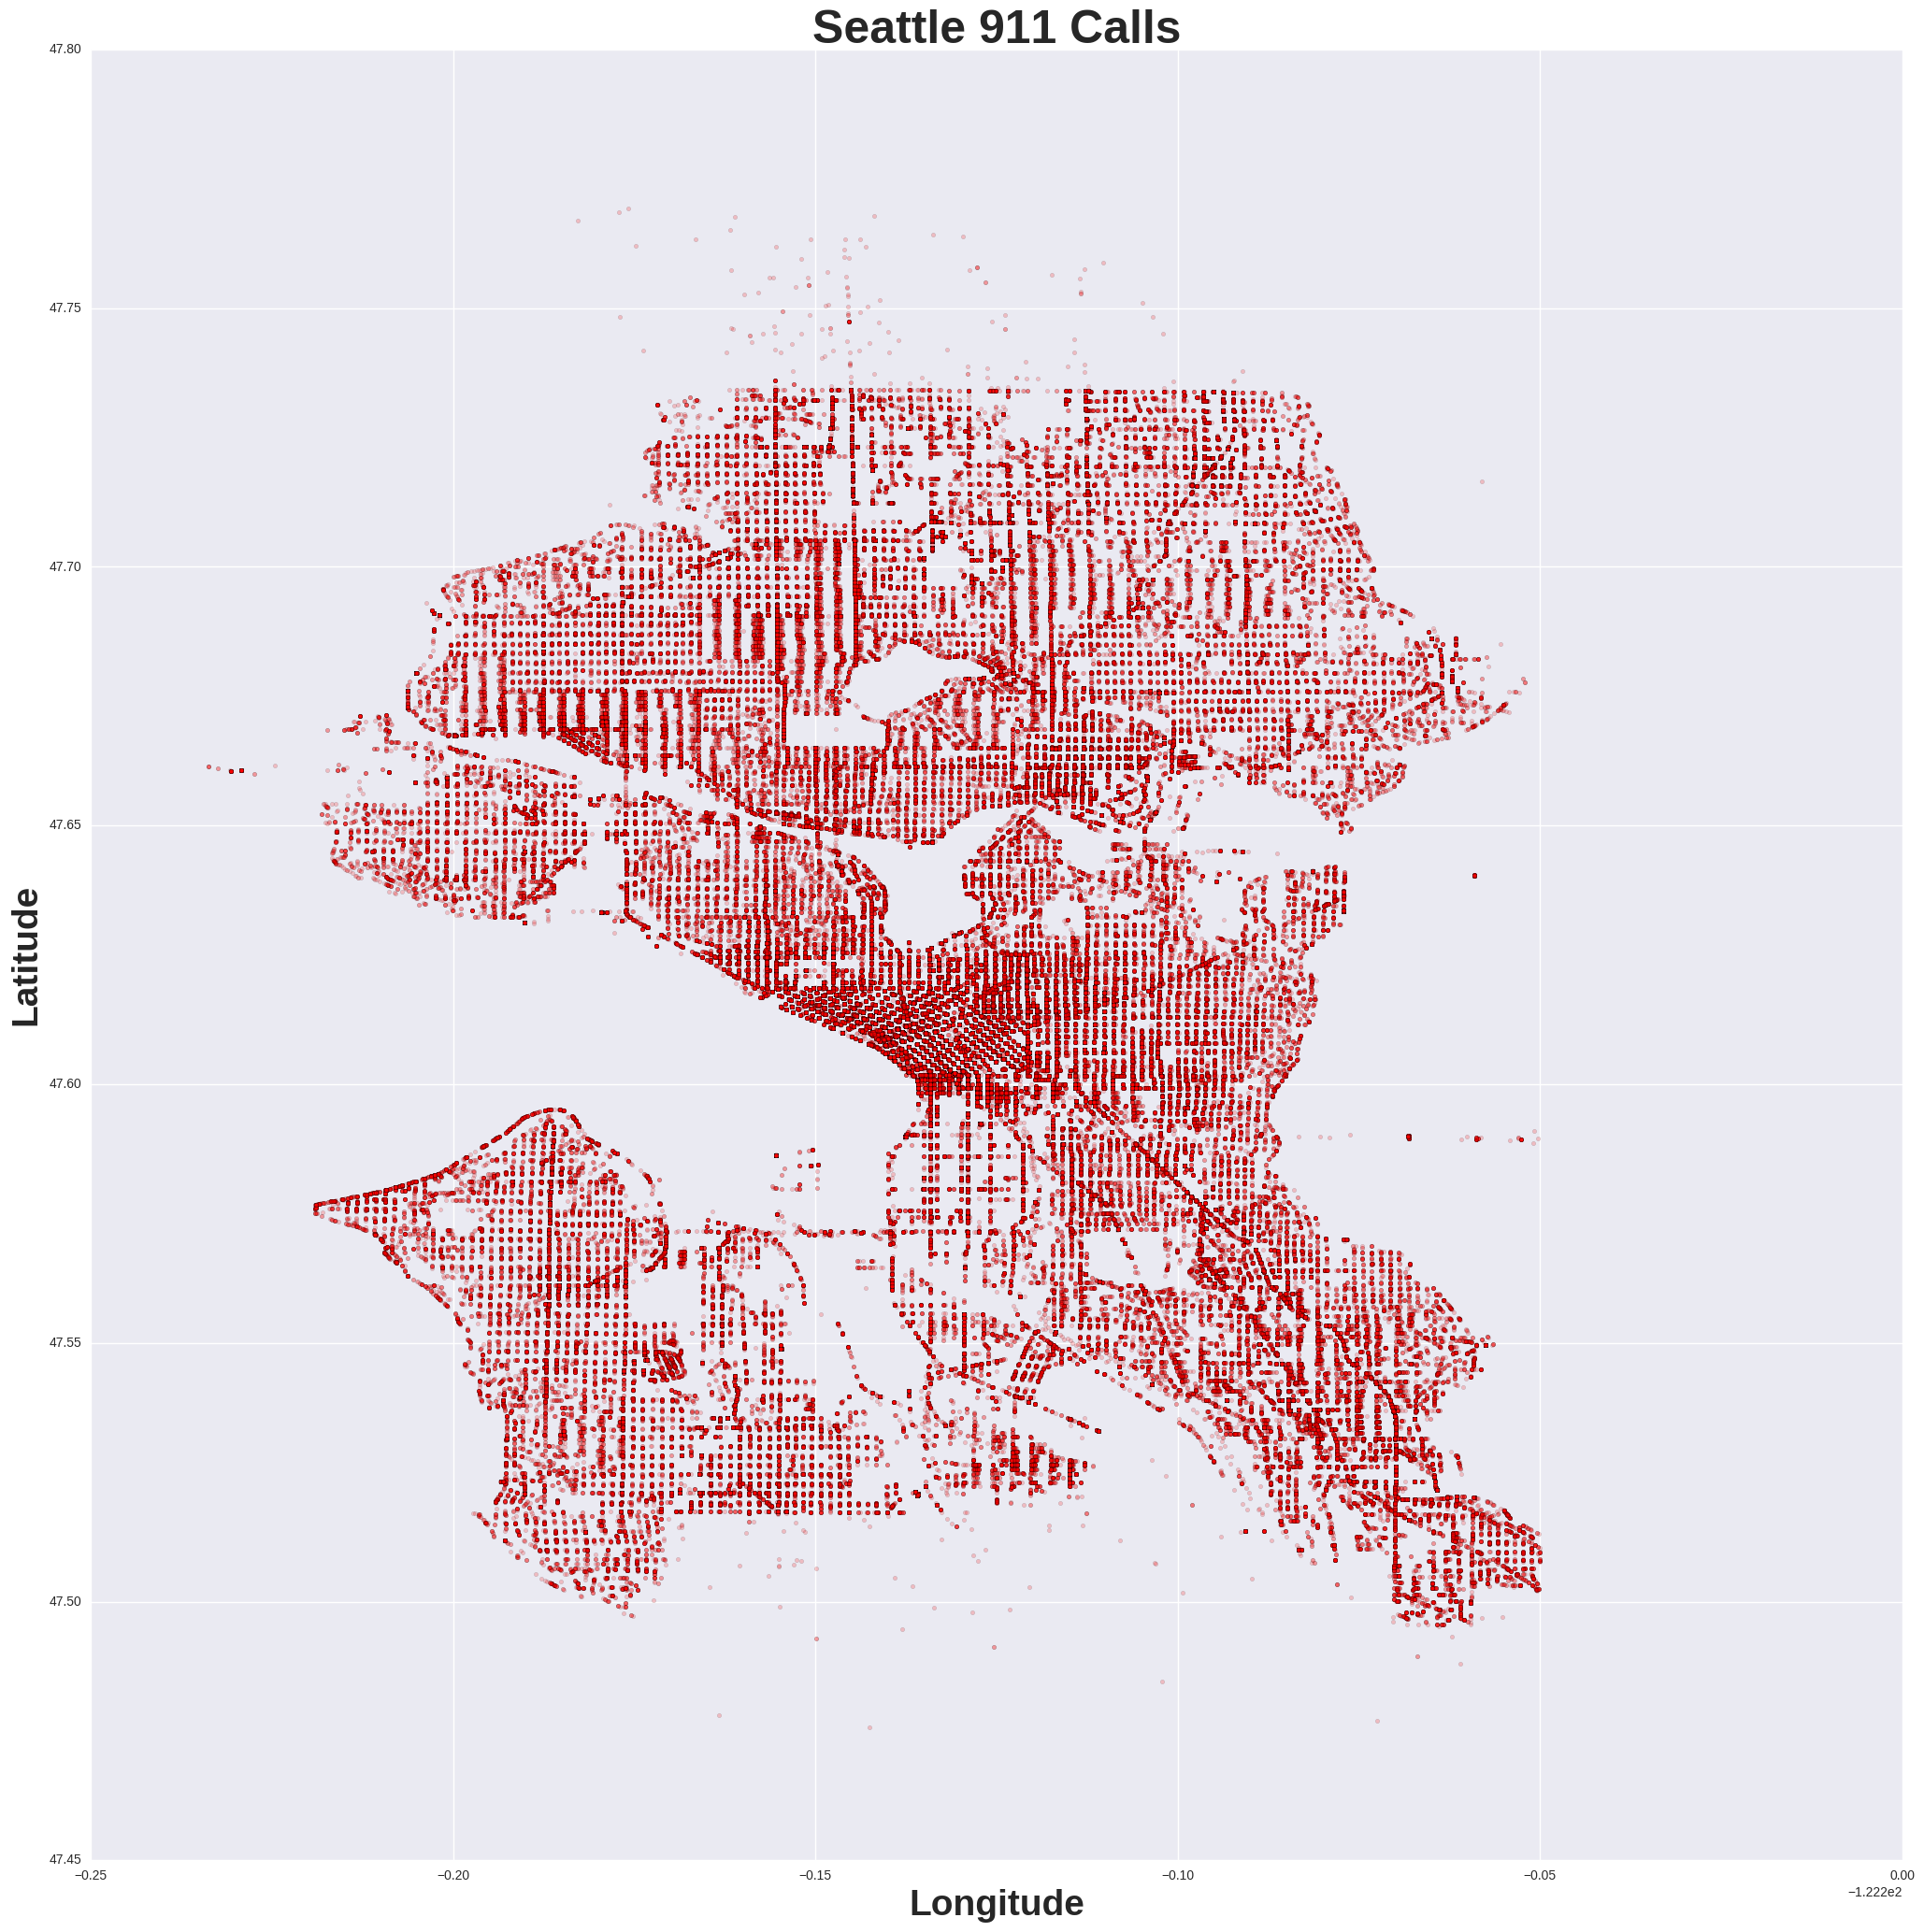

In [12]:
# Create and save a scatter plot (map) of 911 calls
df.plot(kind="scatter", x="Longitude", y="Latitude", color='r', s=10, alpha=0.2, figsize=(25,25))
plt.xlabel('Longitude', fontsize=28, fontweight='bold')
plt.ylabel('Latitude', fontsize=28, fontweight='bold')
plt.title('Seattle 911 Calls', fontsize=36, fontweight='bold')
plt.savefig('seattle_911.png')

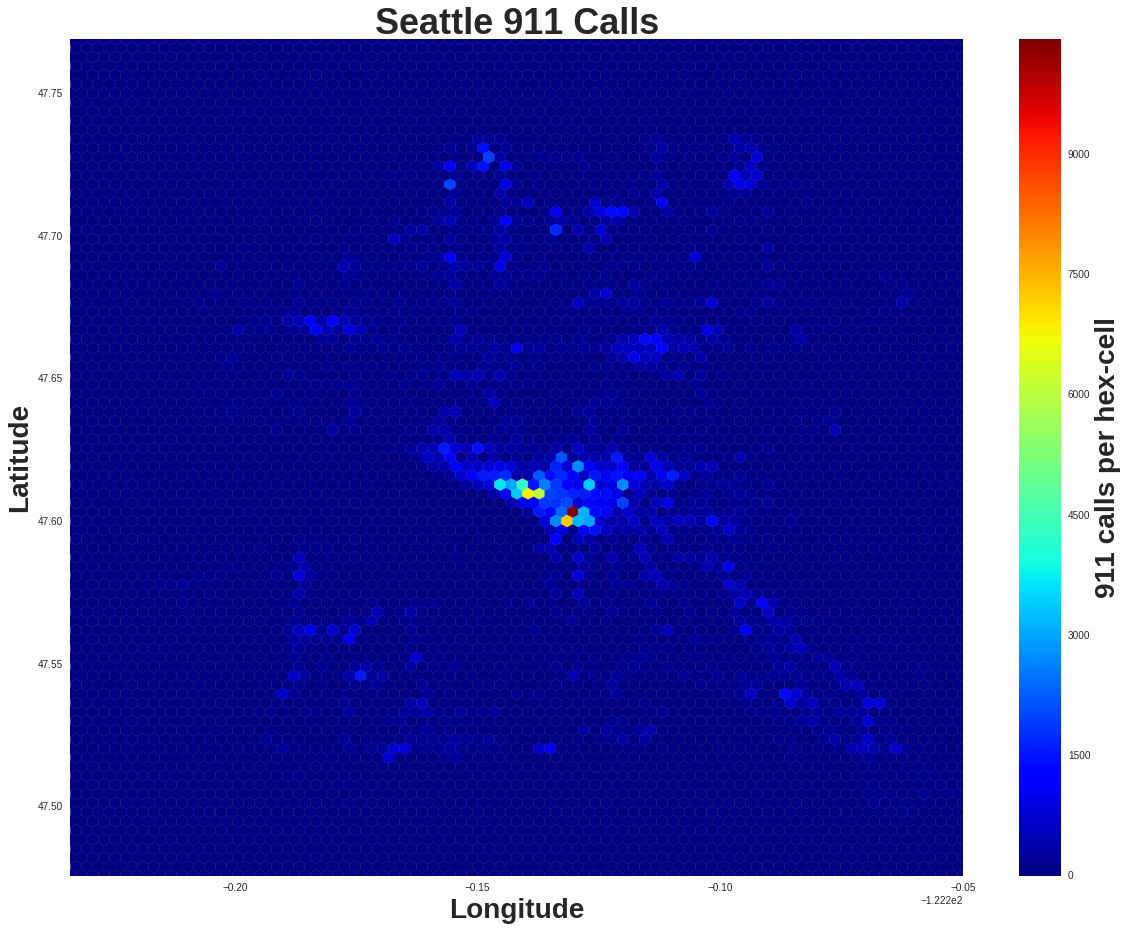

In [10]:
# Define axes for hexbin (3D histogram)
x = df.Longitude
y = df.Latitude

# If 'bins=None', hexagon colors correspond to counts
plt.figure(figsize=(20,15))
plt.hexbin(x, y, gridsize=80, cmap=plt.cm.jet, bins=None)
plt.axis([x.min(), x.max(), y.min(), y.max()])

# Label axes and create plot title
plt.xlabel('Longitude', fontsize=28, fontweight='bold')
plt.ylabel('Latitude', fontsize=28, fontweight='bold')
plt.title('Seattle 911 Calls', fontsize=36, fontweight='bold')

# Generate colormap scale and label, save plot
cb = plt.colorbar()
cb.set_label('911 calls per hex-cell', fontsize=28, fontweight='bold')
plt.savefig('seattle_911_hex.png')   

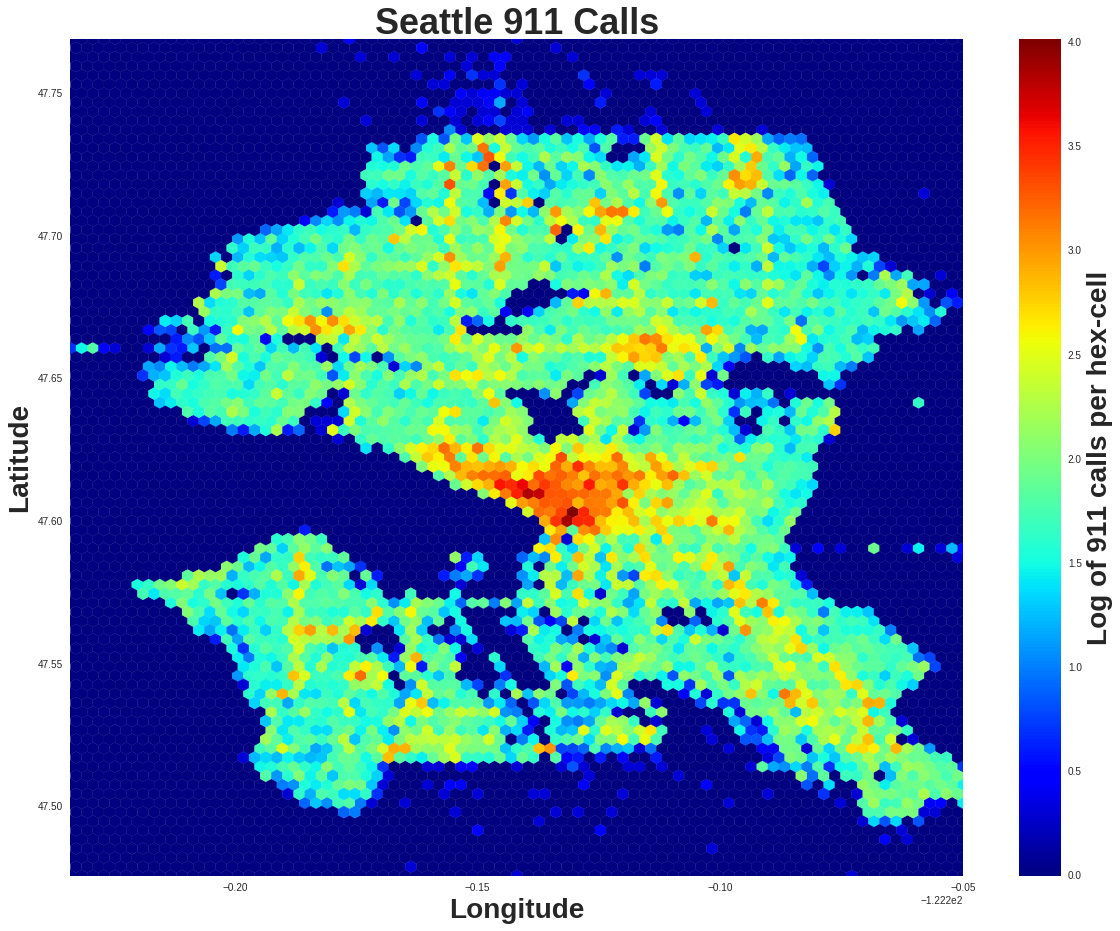

In [12]:
# Define axes for hexbin (3D histogram)
x = df.Longitude
y = df.Latitude

# Use log of counts for bins to reveal more structure  
plt.figure(figsize=(20,15))
plt.hexbin(x, y, gridsize=80, cmap=plt.cm.jet, bins='log')
plt.axis([x.min(), x.max(), y.min(), y.max()])

# Label axes and create plot title
plt.xlabel('Longitude', fontsize=28, fontweight='bold')
plt.ylabel('Latitude', fontsize=28, fontweight='bold')
plt.title('Seattle 911 Calls', fontsize=36, fontweight='bold')

# Generate colormap scale and label, save plot
cb = plt.colorbar()
cb.set_label('Log of 911 calls per hex-cell', fontsize=28, fontweight='bold')
plt.savefig('seattle_911_hexlog.png') 

In [14]:
# Investigate very 'hot' hex in downtown Seattle
df = df[((df['Latitude'] < 47.62) & (df['Latitude'] > 47.60))]
df = df[((df['Longitude'] < -122.33) & (df['Longitude'] > -122.34))]

In [16]:
# Majority of activity medical responses
df.groupby('Type').size()

Type
1RED 1 Unit                      297
3RED - 1 +1 + 1                   12
4RED - 2 + 1 + 1                 144
AFA4 - Auto Alarm 2 + 1 + 1      171
ANTIB - Antibiotic Delivery        1
Activated CO Detector             31
Aid Response                   41645
Aid Response Freeway              29
Aid Response Yellow              328
Aid Service                        6
Alarm Bell                       163
Assault w/Weap 7 per Rule        190
Assault w/Weapons 14               8
Assault w/Weapons, Aid             5
Assault w/Weapons- Aid            35
Auto Fire Alarm                 4075
Automatic Fire Alarm False       198
Automatic Fire Alarm Resd          2
Automatic Medical Alarm          190
Bark Fire                         39
Boat Taking Water Minr/Sho         1
Boat Under 50' Fire Shore          1
Boat Under 50' Fire Water          3
Boat Under 50' Unknown             1
Brush Fire                        18
Brush Fire Freeway                 4
Car Fire                         